In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from hebo.models.model_factory import get_model

In [25]:
torch.manual_seed(42)
xs = 3 * torch.randn(10,1)
ys = xs.sign()
model = get_model('dkl_ens', 1, 0, 1, 
                  sn            = True, 
                  act           = nn.ReLU(),
                  lr            = 1e-2, 
                  verbose       = False, 
                  num_epochs    = 300, 
                  num_hiddens   = 8,
                  num_ensembles = 1)
model.fit(xs,None, ys)

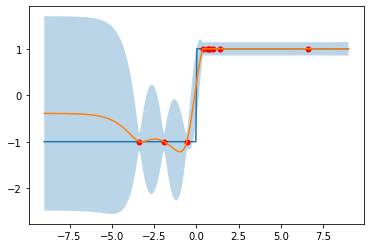

In [26]:
x = torch.linspace(-9,9,300).view(-1,1)
with torch.no_grad():
    py, ps2 = model.predict(x,None)
    plt.plot(x,x.sign())
    plt.plot(xs,ys,'r.',markersize = 10)
    plt.plot(x,py)
    lcb = py - 1.96 * ps2.sqrt()
    ucb = py + 1.96 * ps2.sqrt()
    plt.fill_between(x.view(-1), lcb.view(-1), ucb.view(-1), alpha = 0.3)

In [111]:
model.gps[0].gp.kern.base_kernel.lengthscale.max()

tensor(1.0196, grad_fn=<MaxBackward1>)

In [112]:
model.gps[0].gp

GPyTorchModel(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): LogNormalPrior()
      (raw_noise_constraint): GreaterThan(1.000E-05)
    )
  )
  (fe): Sequential(
    (0): ParametrizedLinear(
      in_features=1, out_features=32, bias=True
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0): _SpectralNorm()
        )
      )
    )
    (1): ReLU()
    (2): ParametrizedLinear(
      in_features=32, out_features=32, bias=True
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0): _SpectralNorm()
        )
      )
    )
    (3): ReLU()
  )
  (mean): ConstantMean()
  (kern): ScaleKernel(
    (base_kernel): MaternKernel(
      (raw_lengthscale_constraint): Positive()
      (distance_module): Distance()
    )
    (outputscale_prior): GammaPrior()
    (raw_outputscale_constraint): Positive()
  )
)